In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import kde
from pandas import Series,DataFrame

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tourism.csv to Tourism (1).csv


In [ ]:
import io
df2= pd.read_csv(io.BytesIO(uploaded['Tourism.csv']))

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df2

,Timestamp,Full Name,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit
0,3/23/2021 13:53:19,Sunanda Dalvi,Female,43,Homemaker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,Transportation/Easy route,Group,Hotel,"Newspaper, TV/Radio travel programs","Value for money, Attractive natural and cultur...","Attend festivals and events, Shopping and markets","Rest and relaxation, Visiting relatives and fr...",Once in a Year,3-5 days,Up to 5 lac,"Up to 10,000","High Street travel agents, Book on arrival",NaN
1,3/23/2021 14:00:06,Baban Dalvi,Male,51,Worker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,"Stay facilities., Transportation/Easy route",Depends,Hotel,"Newspaper, TV/Radio travel programs","Comfort and accessibility, Value for money","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,A week,Up to 5 lac,"Up to 10,000","High Street travel agents, Book on arrival, Em...",NaN
2,3/23/2021 17:04:16,Priya Dalvi,Female,22,Student,Yes,Domestic,Water,"Adventure, Nature","Quality Service, Price",Guide Service,Transportation/Easy route,Depends,Farmhouse,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Attending conference semi...",Once in a Year,1-2 days,Up to 5 lac,"Up to 10,000","Website of travel agents or tour operators, Bo...",Maldives
3,3/23/2021 19:07:25,Sujata,Female,22,Student,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Self-Dependent,Transportation/Easy route,Group,Farmhouse,"Website organized by tourist company, Social m...",Value for money,"Attend festivals and events, Visiting local he...",Rest and relaxation,Once in 6 Months,3-5 days,Up to 5 lac,"Up to 10,000","Website of travel agents or tour operators, Bo...",Ladakh
4,3/23/2021 19:07:30,Girish,Male,23,Student,Yes,Domestic,Road,"Adventure, Nature","Reliability, Language Difficulties, Price",Self-Dependent,"Highly visiting place., Adventures place",Depends,Outdoor activity center,"Website organized by tourist company, Social m...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Visiting relatives and fr...",Every Month,Depend on trip,Up to 5 lac,"Up to 10,000","Online booking agency, Book on arrival, Email ...",Mount abu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5/18/2021 13:45:29,Pritam Thakur,Male,25,Worker,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Guide Service,Stay facilities.,Depends,Outdoor activity center,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment, Attractive nat...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in 6 Months,A week,5 lac- 15 lac,"Up to 10,000","Online booking agency, Book on arr

In [ ]:
df2.shape

(296, 24)

In [ ]:
df2.head(10)

,Timestamp,Full Name,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit
0,3/23/2021 13:53:19,Sunanda Dalvi,Female,43,Homemaker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,Transportation/Easy route,Group,Hotel,"Newspaper, TV/Radio travel programs","Value for money, Attractive natural and cultur...","Attend festivals and events, Shopping and markets","Rest and relaxation, Visiting relatives and fr...",Once in a Year,3-5 days,Up to 5 lac,"Up to 10,000","High Street travel agents, Book on arrival",NaN
1,3/23/2021 14:00:06,Baban Dalvi,Male,51,Worker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,"Stay facilities., Transportation/Easy route",Depends,Hotel,"Newspaper, TV/Radio travel programs","Comfort and accessibility, Value for money","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,A week,Up to 5 lac,"Up to 10,000","High Street travel agents, Book on arrival, Em...",NaN
2,3/23/2021 17:04:16,Priya Dalvi,Female,22,Student,Yes,Domestic,Water,"Adventure, Nature","Quality Service, Price",Guide Service,Transportation/Easy route,Depends,Farmhouse,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Attending conference semi...",Once in a Year,1-2 days,Up to 5 lac,"Up to 10,000","Website of travel agents or tour operators, Bo...",Maldives
3,3/23/2021 19:07:25,Sujata,Female,22,Student,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Self-Dependent,Transportation/Easy route,Group,Farmhouse,"Website organized by tourist company, Social m...",Value for money,"Attend festivals and events, Visiting local he...",Rest and relaxation,Once in 6 Months,3-5 days,Up to 5 lac,"Up to 10,000","Website of travel agents or tour operators, Bo...",Ladakh
4,3/23/2021 19:07:30,Girish,Male,23,Student,Yes,Domestic,Road,"Adventure, Nature","Reliability, Language Difficulties, Price",Self-Dependent,"Highly visiting place., Adventures place",Depends,Outdoor activity center,"Website organized by tourist company, Social m...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Visiting relatives and fr...",Every Month,Depend on trip,Up to 5 lac,"Up to 10,000","Online booking agency, Book on arrival, Email ...",Mount abu
5,3/23/2021 19:11:32,Manisha,Female,22,Student,Yes,International,Water,Adventure,Price,Self-Dependent,"Stay facilities., Transportation/Easy route, H...",Group,Hotel,Newspaper,Comfort and accessibility,Attend festivals and events,Visiting relatives and friends,Once in a Year,1-2 days,Up to 5 lac,"50,000 - 1 lac",High Street travel agents,Dharavi
6,3/23/2021 19:21:47,Aashish Auti,Male,22,Student,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Self-Dependent,"Stay facilities., Transportation/Easy route",Group,Farmhouse,"Website organized by tourist compan

In [ ]:
df2.tail(10)

,Timestamp,Full Name,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit
286,5/16/2021 12:49:33,Suman,Female,57,Homemaker,Yes,Domestic,Road,"Nature, Religious sentiment","Quality Service, Language Difficulties",Self-Dependent,"Stay facilities., Transportation/Easy route",Group,Hotel,"Newspaper, TV/Radio travel programs","Value for money, Consideration of sustainable ...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,A week,15 lac - 25 lac,"10,000 - 50,000","Online booking agency, Book on arrival",NaN
287,5/16/2021 12:51:25,Babasaheb,Male,38,Worker,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Language Difficulties",Guide Service,Stay facilities.,Group,Outdoor activity center,"Newspaper, TV/Radio travel programs","Value for money, Attractive natural and cultur...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in 6 Months,3-5 days,15 lac - 25 lac,"10,000 - 50,000","Online booking agency, Email or phone to indiv...",NaN
288,5/18/2021 13:30:36,Anil Dalvi,Male,29,Worker,Yes,Domestic,Road,"Adventure, Nature, Religious sentiment","Quality Service, Price",Guide Service,Stay facilities.,Group,Hotel,"Newspaper, TV/Radio travel programs","Value for money, Entertainment","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in 6 Months,3-5 days,Up to 5 lac,"Up to 10,000","High Street travel agents, Book on arrival, Em...",NaN
289,5/18/2021 13:33:09,Tukaram Dalvi,Male,37,Worker,Yes,Domestic,Road,"Culture, Nature, Religious sentiment","Language Difficulties, Price",Self-Dependent,"Stay facilities., Transportation/Easy route",Group,Farmhouse,"Newspaper, TV/Radio travel programs","Comfort and accessibility, Value for money, At...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,3-5 days,5 lac- 15 lac,"Up to 10,000","Book on arrival, Email or phone to individual ...",NaN
290,5/18/2021 13:41:22,Madhavi Ghodke,Female,24,Worker,Yes,Domestic,Road,"Adventure, Nature, Religious sentiment","Quality Service, Reliability",Guide Service,Stay facilities.,Group,Hotel,"TV/Radio travel programs, Social media","Comfort and accessibility, Value for money, En...","Attend festivals and events, Joining local act...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,A week,5 lac- 15 lac,"Up to 10,000","Website of travel agents or tour operators, On...",NaN
291,5/18/2021 13:45:29,Pritam Thakur,Male,25,Worker,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Guide Service,Stay facilities.,Depends,Outdoor activity center,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment, Attractive nat...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in 6 Months,A week,5 lac- 15 lac,"Up to 10,000","Online booking agency, Book on arrival, Email ...",Himachal
292,5/18/2021 13:49:59

In [ ]:
df2.columns

Index(['Timestamp', 'Full Name', 'Gender', 'Age', 'Occupation',
       'Do you like to travel?',
       'Which Type of Destination will you prefer the most?',
       'Which Type of Mode will you prefer for Travel most?',
       'What is your main interest in selecting a destination?',
       'What are the main challenging problems that you face when choosing a destination?',
       'Do you prefer to use tourist guide service or self-dependent?',
       'When you plan a tour, what factors becomes your top priority?',
       'What kind of tour would you prefer?',
       'What kind of accommodation do you prefer to stay in?',
       'How do you search for the destination you want to visit?',
       'What are the important factors in choosing  your tourism destination?',
       'What would you prioritize if offered the following on tour?',
       'What are the main reasons for your visit?',
       'How frequently you visit tourist places in a year?',
       'What is generally the length of

In [ ]:
df2.dtypes

Timestamp                                                                            object
Full Name                                                                            object
Gender                                                                               object
Age                                                                                   int64
Occupation                                                                           object
Do you like to travel?                                                               object
Which Type of Destination will you prefer the most?                                  object
Which Type of Mode will you prefer for Travel most?                                  object
What is your main interest in selecting a destination?                               object
What are the main challenging problems that you face when choosing a destination?    object
Do you prefer to use tourist guide service or self-dependent?                   

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 24 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Timestamp                                                                          296 non-null    object
 1   Full Name                                                                          296 non-null    object
 2   Gender                                                                             296 non-null    object
 3   Age                                                                                296 non-null    int64 
 4   Occupation                                                                         296 non-null    object
 5   Do you like to travel?                                                             296 non-null    object
 6   Wh

In [ ]:
df2.describe()

,Age
count,296.000000
mean,27.070946
std,9.901808
min,12.000000
25%,22.000000
50%,24.000000
75%,26.000000
max,85.000000


#**Data Cleaning And Data Manipulation**

---


In [ ]:
df2.isnull()

,Timestamp,Full Name,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
293,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df2.isnull().sum()

Timestamp                                                                              0
Full Name                                                                              0
Gender                                                                                 0
Age                                                                                    0
Occupation                                                                             0
Do you like to travel?                                                                 0
Which Type of Destination will you prefer the most?                                    0
Which Type of Mode will you prefer for Travel most?                                    0
What is your main interest in selecting a destination?                                 0
What are the main challenging problems that you face when choosing a destination?      0
Do you prefer to use tourist guide service or self-dependent?                          0
When you plan a tour,

In [ ]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
291    False
292    False
293    False
294    False
295    False
Length: 296, dtype: bool

In [ ]:
df2.duplicated().sum()

0

In [ ]:
duplicate=df2[df2.duplicated()]
duplicate

,Timestamp,Full Name,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit


In [ ]:
df2.drop_duplicates

<bound method DataFrame.drop_duplicates of               Timestamp      Full Name  Gender  Age Occupation  \
0    3/23/2021 13:53:19  Sunanda Dalvi  Female   43  Homemaker   
1    3/23/2021 14:00:06    Baban Dalvi    Male   51     Worker   
2    3/23/2021 17:04:16    Priya Dalvi  Female   22    Student   
3    3/23/2021 19:07:25         Sujata  Female   22    Student   
4    3/23/2021 19:07:30         Girish    Male   23    Student   
..                  ...            ...     ...  ...        ...   
291  5/18/2021 13:45:29  Pritam Thakur    Male   25     Worker   
292  5/18/2021 13:49:59   Sujata Powar  Female   27  Homemaker   
293  5/18/2021 13:54:36    Nishad Mali    Male   24     Worker   
294  5/18/2021 13:59:58    Shalva Iyer  Female   22    Student   
295  5/18/2021 14:06:46     Akshay Lad    Male   25     Worker   

    Do you like to travel?  \
0                      Yes   
1                      Yes   
2                      Yes   
3                      Yes   
4             

In [ ]:
pd.DataFrame(round(df2.isnull().sum()/df2.shape[0] * 100,3), columns = ["Missing"])

,Missing
Timestamp,0.000
Full Name,0.000
Gender,0.000
Age,0.000
Occupation,0.000
Do you like to travel?,0.000
Which Type of Destination will you prefer the most?,0.000
Which Type of Mode will you prefer for Travel most?,0.000
What is your main interest in selecting a destination?,0.000
What are the main challenging problems that you face when choosing a destination?,0.000


In [ ]:
df2.rename(columns={'Which Type of Destination will you prefer the most?':'Most preferred type of Destination',
                  'Which Type of Mode will you prefer for Travel most?':'Most preferred type of Mode',
                   'What is your main interest in selecting a destination?':'Main interest in selecting a destination',
                   'What are the main challenging problems that you face when choosing a destination?':'Challenging problems faced when choosing a destination',
                   'Do you prefer to use tourist guide service or self-dependent?':'Preferred to use tourist guide service or self-dependent',
                   'When you plan a tour, what factors becomes your top priority?':'Top priority factors for planning a tour',
                   'What kind of tour would you prefer?':'Preferred kind of tour Guide service OR Self-dependent',
                   'What kind of accommodation do you prefer to stay in?':'Preferred type Of accomodation to stay in',
                   'How do you search for the destination you want to visit?':'Preferred type of way to search destination to visit',
                   'What are the important factors in choosing your tourism destination?':'Important factors in choosing tourism destination',
                   'What would you prioritize if offered the following on tour?':'priority if offered the following on tour',
                   'What are the main reasons for your visit?':'Main reasons for visit',
                   'How frequently you visit tourist places in a year?':'Frequency to visit tourist places in a year',
                   'What is generally the length of your trip?':'General length of trip',
                   'Your Family Income Level (per annum):':'Family Income Level (per annum):',
                   'How much do you spend on a trip on an average in a year ?':'Amount spent on a trip on an average in a year',
                   'How do you book a tour?':'Preferred medium to book a tour',
                   'Name of destination you wish to visit':'Destination'},inplace=True)


In [ ]:
df2.columns

Index(['Timestamp', 'Full Name', 'Gender', 'Age', 'Occupation',
       'Do you like to travel?', 'Most preferred type of Destination',
       'Most preferred type of Mode',
       'Main interest in selecting a destination',
       'Challenging problems faced when choosing a destination',
       'Preferred to use tourist guide service or self-dependent',
       'Top priority factors for planning a tour',
       'Preferred kind of tour Guide service OR Self-dependent',
       'Preferred type Of accomodation to stay in',
       'Preferred type of way to search destination to visit',
       'What are the important factors in choosing  your tourism destination?',
       'priority if offered the following on tour', 'Main reasons for visit',
       'Frequency to visit tourist places in a year', 'General length of trip',
       'Family Income Level (per annum):',
       'Amount spent on a trip on an average in a year',
       'Preferred medium to book a tour',
       'Name of destination you w

In [ ]:
df2.rename(columns={'What are the important factors in choosing  your tourism destination?':'Important factors in choosing  your tourism destination',
                    'Preferred to use tourist guide service or self-dependent?':'Preferred to use tourist guide service or self-dependent',
                    'Name of destination you wish to visit':'Destination'},inplace=True)

In [ ]:
df2.rename(columns={'Name of destination you wish to visit ':'Destination Name'},inplace=True)

In [ ]:
df2.columns

Index(['Timestamp', 'Full Name', 'Gender', 'Age', 'Occupation',
       'Do you like to travel?', 'Most preferred type of Destination',
       'Most preferred type of Mode',
       'Main interest in selecting a destination',
       'Challenging problems faced when choosing a destination',
       'Preferred to use tourist guide service or self-dependent',
       'Top priority factors for planning a tour',
       'Preferred kind of tour Guide service OR Self-dependent',
       'Preferred type Of accomodation to stay in',
       'Preferred type of way to search destination to visit',
       'Important factors in choosing  your tourism destination',
       'priority if offered the following on tour', 'Main reasons for visit',
       'Frequency to visit tourist places in a year', 'General length of trip',
       'Family Income Level (per annum):',
       'Amount spent on a trip on an average in a year',
       'Preferred medium to book a tour', 'Destination Name'],
      dtype='object')

# Visualization of Data

---



# Visualization of attribute-Age

In [ ]:
df2['Age'].describe()

count    296.000000
mean      27.070946
std        9.901808
min       12.000000
25%       22.000000
50%       24.000000
75%       26.000000
max       85.000000
Name: Age, dtype: float64

In [ ]:
df2['Age'].value_counts(ascending=True)

12     1
75     1
65     1
57     1
56     1
55     1
53     1
45     1
42     1
78     1
34     1
33     1
32     1
85     1
15     1
29     2
17     2
18     2
51     2
44     2
52     3
50     3
47     3
46     3
43     3
36     3
37     3
35     3
30     3
19     4
40     5
38     5
28     6
26     7
27    11
21    14
20    19
25    30
22    37
24    41
23    65
Name: Age, dtype: int64

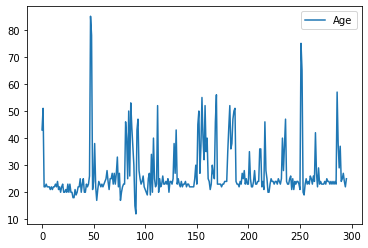

In [ ]:
df2.plot()

<function matplotlib.pyplot.show>

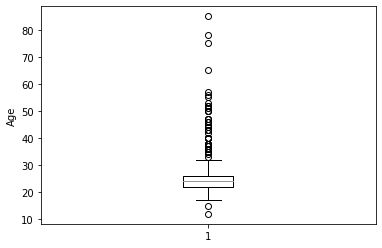

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.boxplot(df2['Age'])
ax.set_ylabel("Age")
plt.show

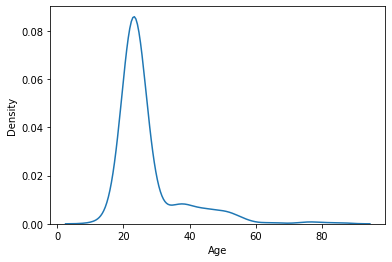

In [ ]:
sns.kdeplot(df2['Age'])

# Visualization of attribute-Gender

In [ ]:
df2['Gender'].describe()

count        296
unique         2
top       Female
freq         162
Name: Gender, dtype: object

In [ ]:
df2['Gender'].value_counts(ascending=True)

Male      134
Female    162
Name: Gender, dtype: int64

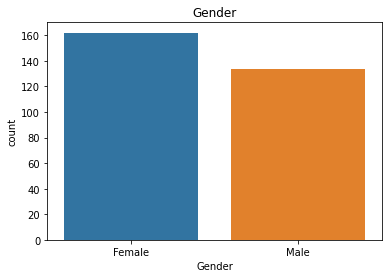

In [ ]:
sns.countplot(x='Gender',data=df2)
plt.title("Gender")
plt.show()

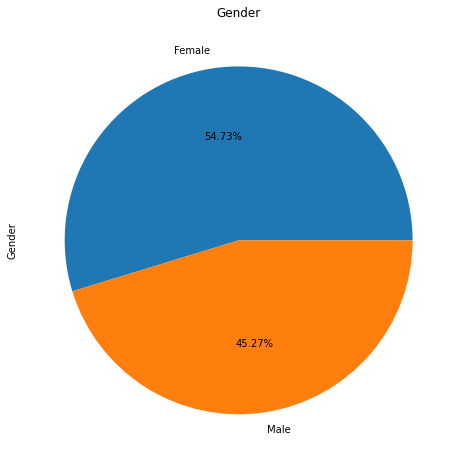

In [ ]:
df2['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Gender")
plt.show()

# Visualization of attribute-Occupation

In [ ]:
df2['Occupation'].describe()

count        296
unique         4
top       Worker
freq         143
Name: Occupation, dtype: object

In [ ]:
df2['Occupation'].value_counts(ascending=True)

Retired person      3
Homemaker          15
Student           135
Worker            143
Name: Occupation, dtype: int64

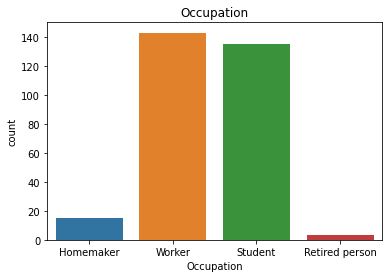

In [ ]:
sns.countplot(x='Occupation',data=df2)
plt.title("Occupation")
plt.show()

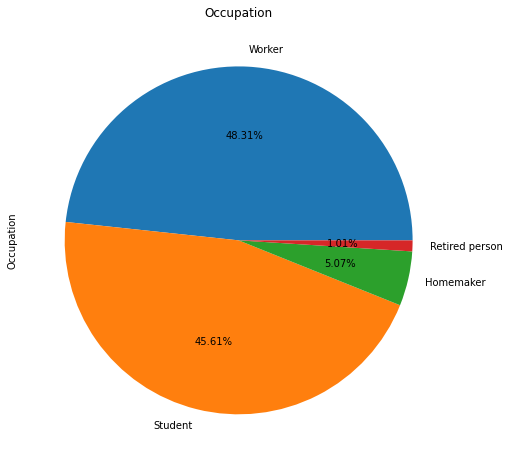

In [ ]:
df2['Occupation'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Occupation")
plt.show()

# Visualization of attribute-Do you like to travel?

In [ ]:
df2['Do you like to travel?'].describe()

count     296
unique      2
top       Yes
freq      293
Name: Do you like to travel?, dtype: object

In [ ]:
df2['Do you like to travel?'].value_counts(ascending=True)

No       3
Yes    293
Name: Do you like to travel?, dtype: int64

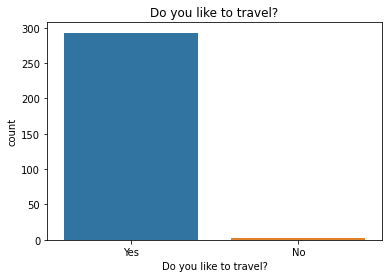

In [ ]:
sns.countplot(x='Do you like to travel?',data=df2)
plt.title("Do you like to travel?")
plt.show()

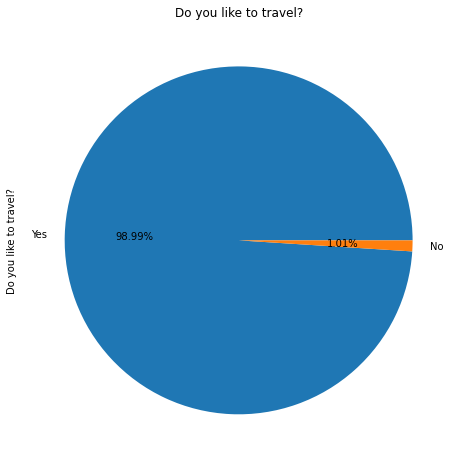

In [ ]:
df2['Do you like to travel?'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Do you like to travel?")
plt.show()

# Visualization of attribute-Most preferred type of Destination

In [ ]:
df2['Most preferred type of Destination'].describe()

count          296
unique           2
top       Domestic
freq           192
Name: Most preferred type of Destination, dtype: object

In [ ]:
df2['Most preferred type of Destination'].value_counts(ascending=True)


International    104
Domestic         192
Name: Most preferred type of Destination, dtype: int64

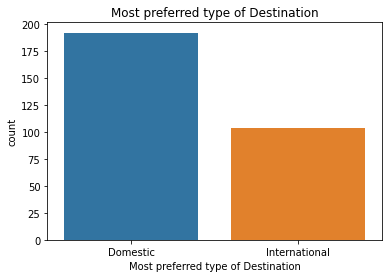

In [ ]:
sns.countplot(x='Most preferred type of Destination',data=df2)
plt.title("Most preferred type of Destination")
plt.show()

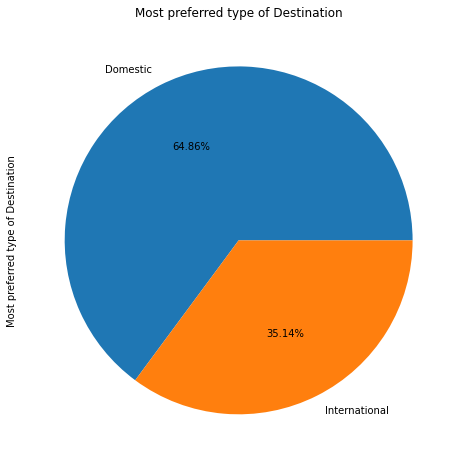

In [ ]:
df2['Most preferred type of Destination'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Most preferred type of Destination")
plt.show()

# Visualization of attribute-Most preferred type of Mode

In [ ]:
df2['Most preferred type of Mode'].describe()

count      296
unique       3
top       Road
freq       185
Name: Most preferred type of Mode, dtype: object

In [ ]:
df2['Most preferred type of Mode'].value_counts(ascending=True)

Water     12
Air       99
Road     185
Name: Most preferred type of Mode, dtype: int64

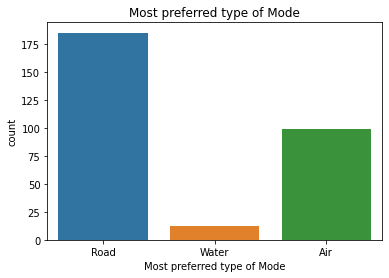

In [ ]:
sns.countplot(x='Most preferred type of Mode',data=df2)
plt.title("Most preferred type of Mode")
plt.show()

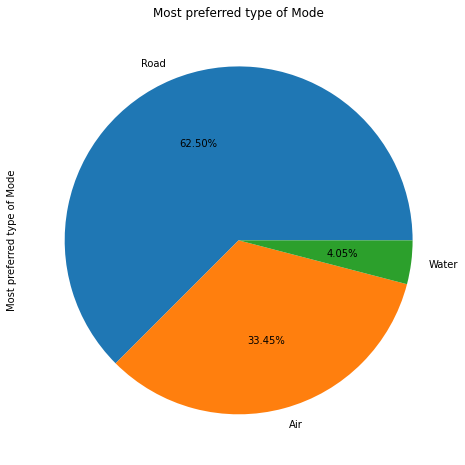

In [ ]:
df2['Most preferred type of Mode'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Most preferred type of Mode")
plt.show()

# Visualization of attribute-Main interest in selecting a destination

In [ ]:
df2['Main interest in selecting a destination'].describe()

count                   296
unique                   15
top       Adventure, Nature
freq                     87
Name: Main interest in selecting a destination, dtype: object

In [ ]:
df2['Main interest in selecting a destination'].value_counts(ascending=True)

Adventure, Religious sentiment                      1
Adventure, Culture, Religious sentiment             1
Culture                                             2
Adventure, Culture                                  2
Culture, Religious sentiment                        5
Religious sentiment                                 5
Adventure, Culture, Nature, Religious sentiment     9
Culture, Nature                                    12
Culture, Nature, Religious sentiment               19
Adventure                                          25
Adventure, Culture, Nature                         28
Adventure, Nature, Religious sentiment             29
Nature                                             32
Nature, Religious sentiment                        39
Adventure, Nature                                  87
Name: Main interest in selecting a destination, dtype: int64

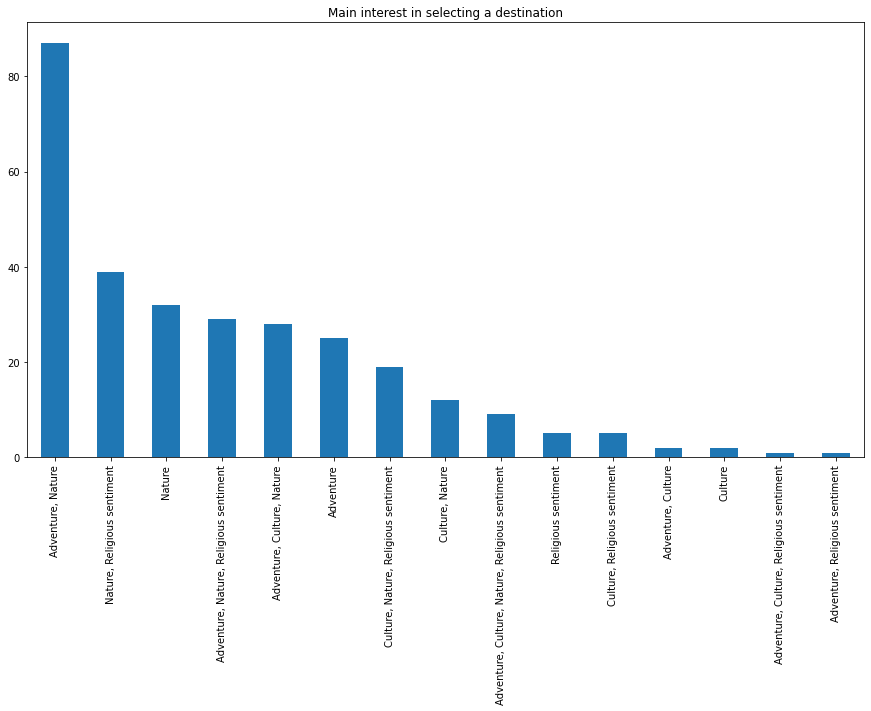

In [ ]:
df2['Main interest in selecting a destination'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("Main interest in selecting a destination")
plt.show()

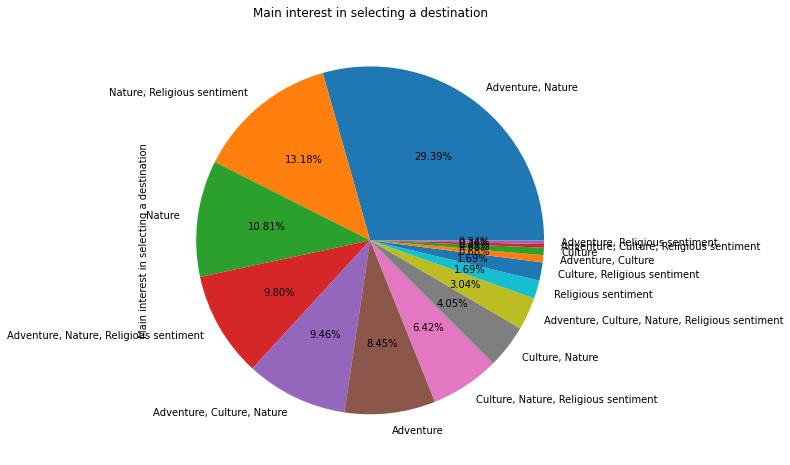

In [ ]:
df2['Main interest in selecting a destination'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Main interest in selecting a destination")
plt.show()

# Visualization of attribute-Challenging problems faced when choosing a destination

In [ ]:
df2['Challenging problems faced when choosing a destination'].describe()

count                                               296
unique                                               15
top       Quality Service, Language Difficulties, Price
freq                                                 48
Name: Challenging problems faced when choosing a destination, dtype: object

In [ ]:
df2['Challenging problems faced when choosing a destination'].value_counts(ascending=True)

Quality Service, Reliability, Language Difficulties            2
Reliability, Language Difficulties                             3
Reliability, Language Difficulties, Price                      5
Language Difficulties                                          7
Quality Service, Reliability, Language Difficulties, Price     8
Reliability, Price                                             9
Reliability                                                   16
Quality Service, Reliability, Price                           17
Price                                                         17
Quality Service, Language Difficulties                        19
Quality Service                                               20
Quality Service, Reliability                                  31
Language Difficulties, Price                                  46
Quality Service, Price                                        48
Quality Service, Language Difficulties, Price                 48
Name: Challenging problem

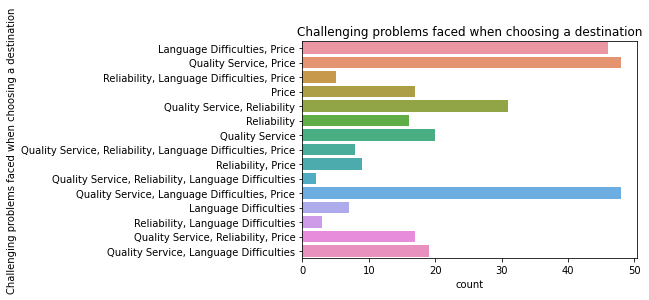

In [ ]:
sns.countplot(y='Challenging problems faced when choosing a destination',data=df2)
plt.title("Challenging problems faced when choosing a destination")
plt.show()

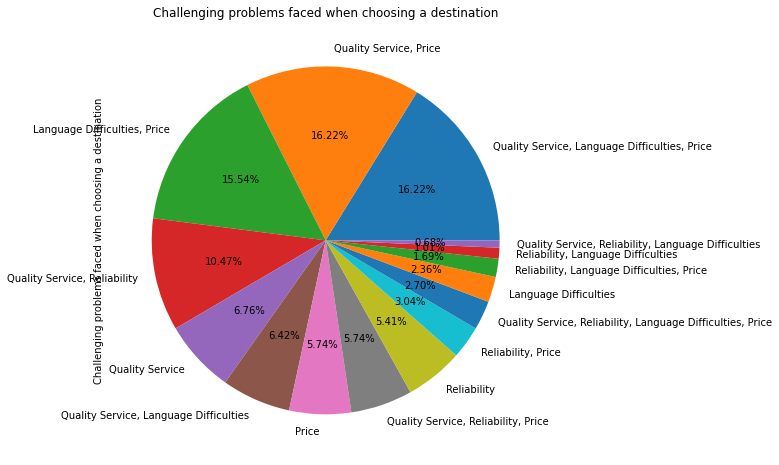

In [ ]:
df2['Challenging problems faced when choosing a destination'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Challenging problems faced when choosing a destination")
plt.show()

# Visualization of attribute-Preferred to use tourist guide service or self-dependent'

In [ ]:
df2['Preferred to use tourist guide service or self-dependent'].describe()

count               296
unique                2
top       Guide Service
freq                195
Name: Preferred to use tourist guide service or self-dependent, dtype: object

In [ ]:
df2['Preferred to use tourist guide service or self-dependent'].value_counts(ascending=True)

Self-Dependent    101
Guide Service     195
Name: Preferred to use tourist guide service or self-dependent, dtype: int64

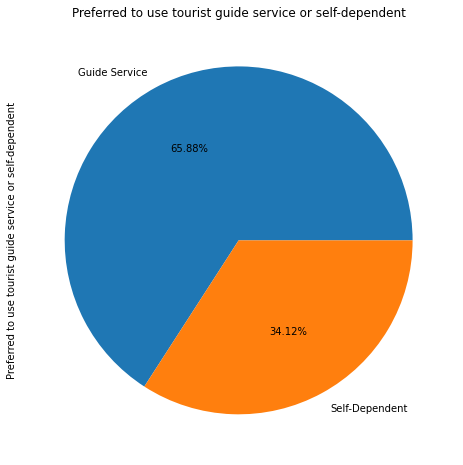

In [ ]:
df2['Preferred to use tourist guide service or self-dependent'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Preferred to use tourist guide service or self-dependent")
plt.show()

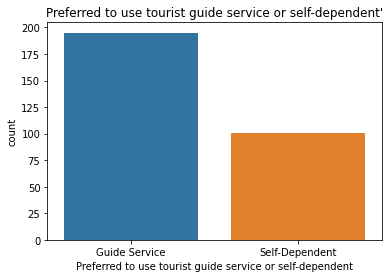

In [ ]:
sns.countplot(x='Preferred to use tourist guide service or self-dependent',data=df2)
plt.title("Preferred to use tourist guide service or self-dependent'")
plt.show()

#Visualization of attribute-Top priority factors for planning a tour'

In [ ]:
df2['Top priority factors for planning a tour'].describe()

count                  296
unique                   8
top       Stay facilities.
freq                    73
Name: Top priority factors for planning a tour, dtype: object

In [ ]:
df2['Top priority factors for planning a tour'].value_counts(ascending=True)

Highly visiting place., Adventures place                                1
Highly visiting place.                                                 16
Stay facilities., Transportation/Easy route, Highly visiting place.    26
Transportation/Easy route, Highly visiting place.                      31
Transportation/Easy route                                              31
Stay facilities., Highly visiting place.                               49
Stay facilities., Transportation/Easy route                            69
Stay facilities.                                                       73
Name: Top priority factors for planning a tour, dtype: int64

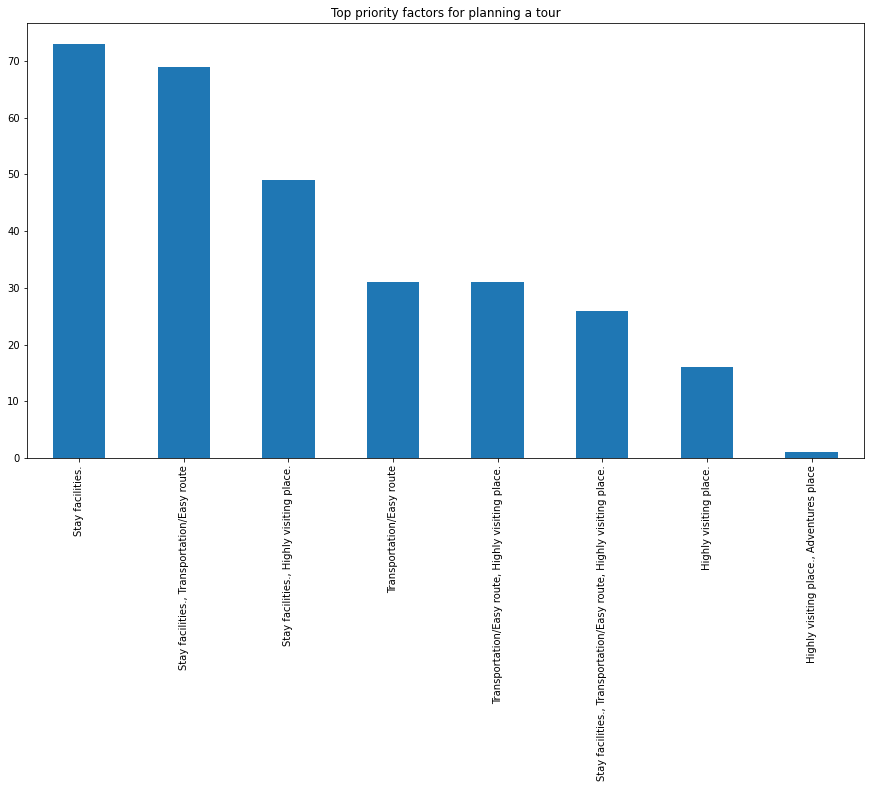

In [ ]:
df2['Top priority factors for planning a tour'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("Top priority factors for planning a tour")
plt.show()

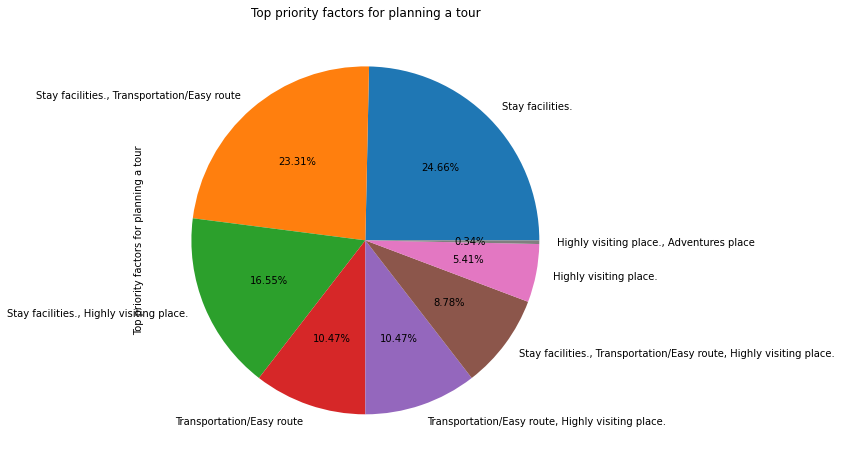

In [ ]:
df2['Top priority factors for planning a tour'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Top priority factors for planning a tour")
plt.show()

# Visualization of attribute-Preferred kind of tour Guide service OR Self-dependent

In [ ]:
df2['Preferred kind of tour Guide service OR Self-dependent'].describe()

count       296
unique        3
top       Group
freq        153
Name: Preferred kind of tour Guide service OR Self-dependent, dtype: object

In [ ]:
df2['Preferred kind of tour Guide service OR Self-dependent'].value_counts(ascending=True)

Individual     13
Depends       130
Group         153
Name: Preferred kind of tour Guide service OR Self-dependent, dtype: int64

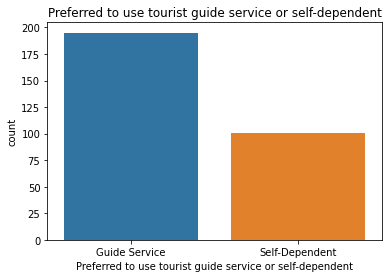

In [ ]:
sns.countplot(x='Preferred to use tourist guide service or self-dependent',data=df2)
plt.title("Preferred to use tourist guide service or self-dependent")
plt.show()

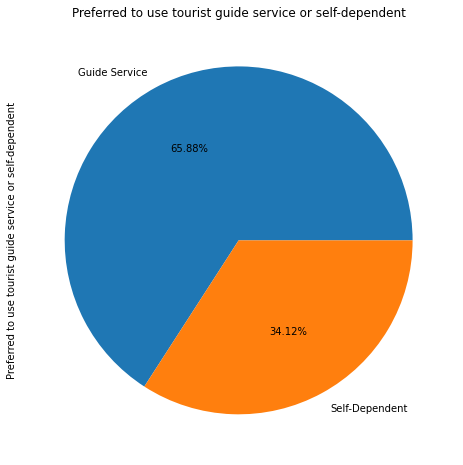

In [ ]:
df2['Preferred to use tourist guide service or self-dependent'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Preferred to use tourist guide service or self-dependent")
plt.show()

# Visualization of attribute-Preferred type Of accomodation to stay in

In [ ]:
df2['Preferred type Of accomodation to stay in'].describe()

count       296
unique        3
top       Hotel
freq        133
Name: Preferred type Of accomodation to stay in, dtype: object

In [ ]:
df2['Preferred type Of accomodation to stay in'].value_counts(ascending=True)

Outdoor activity center     74
Farmhouse                   89
Hotel                      133
Name: Preferred type Of accomodation to stay in, dtype: int64

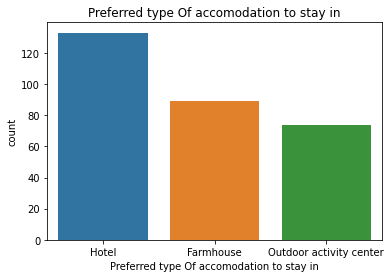

In [ ]:
sns.countplot(x='Preferred type Of accomodation to stay in',data=df2)
plt.title("Preferred type Of accomodation to stay in")
plt.show()

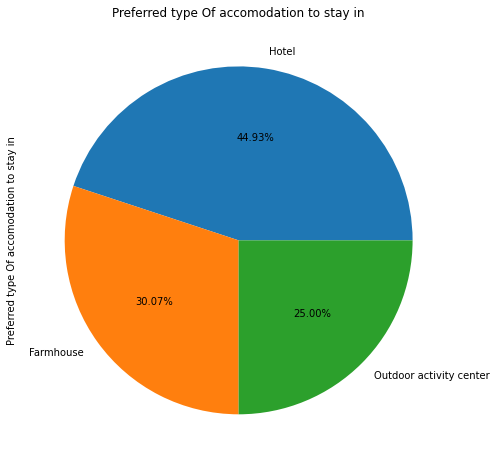

In [ ]:
df2['Preferred type Of accomodation to stay in'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Preferred type Of accomodation to stay in")
plt.show()

# Visualization of attribute-Preferred type of way to search destination to visit

In [ ]:
df2['Preferred type of way to search destination to visit'].describe()

count                                                   296
unique                                                   27
top       Website organized by tourist company, TV/Radio...
freq                                                     69
Name: Preferred type of way to search destination to visit, dtype: object

In [ ]:
df2['Preferred type of way to search destination to visit'].value_counts(ascending=True)

Website organized by tourist company, Newspaper                                                          1
Website organized by tourist company, Guide books, Newspaper, TV/Radio travel programs                   1
Website organized by tourist company, Guide books                                                        1
Guide books, Newspaper                                                                                   1
Guide books, TV/Radio travel programs, Social media                                                      1
Guide books, Newspaper, TV/Radio travel programs, Social media                                           1
Newspaper                                                                                                1
Newspaper, Social media                                                                                  2
Guide books, Newspaper, Social media                                                                     2
Website organized by tourist company,

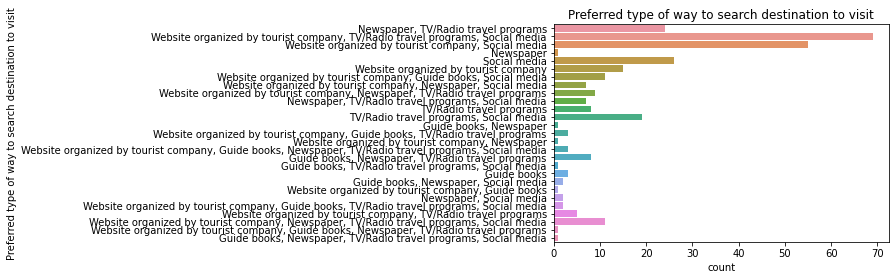

In [ ]:
sns.countplot(y='Preferred type of way to search destination to visit',data=df2)
plt.title("Preferred type of way to search destination to visit")
plt.show()

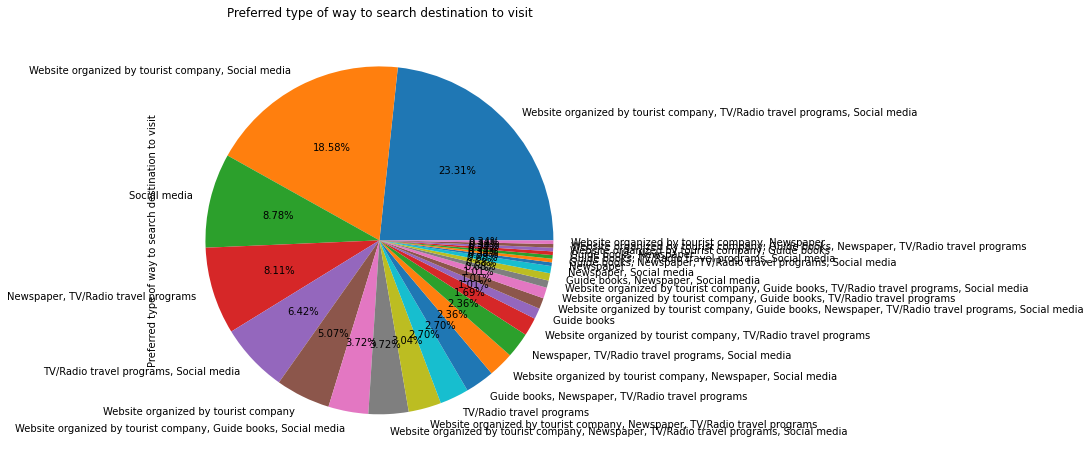

In [ ]:
df2['Preferred type of way to search destination to visit'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Preferred type of way to search destination to visit")
plt.show()

# Visualization of attribute-Important factors in choosing  your tourism destination

In [ ]:
df2['Important factors in choosing  your tourism destination'].describe()

count                                296
unique                                33
top       Value for money, Entertainment
freq                                  40
Name: Important factors in choosing  your tourism destination, dtype: object

In [ ]:
df2['Important factors in choosing  your tourism destination'].value_counts(ascending=True)

Consideration of sustainable principles, Entertainment                                                                                                          1
Consideration of sustainable principles, Entertainment, Attractive natural and cultural location                                                                1
Comfort and accessibility, Consideration of sustainable principles, Entertainment                                                                               1
Comfort and accessibility, Value for money, Entertainment and night life                                                                                        1
Comfort and accessibility, Consideration of sustainable principles                                                                                              1
Entertainment and night life                                                                                                                                    1
Comfort and accessibility, C

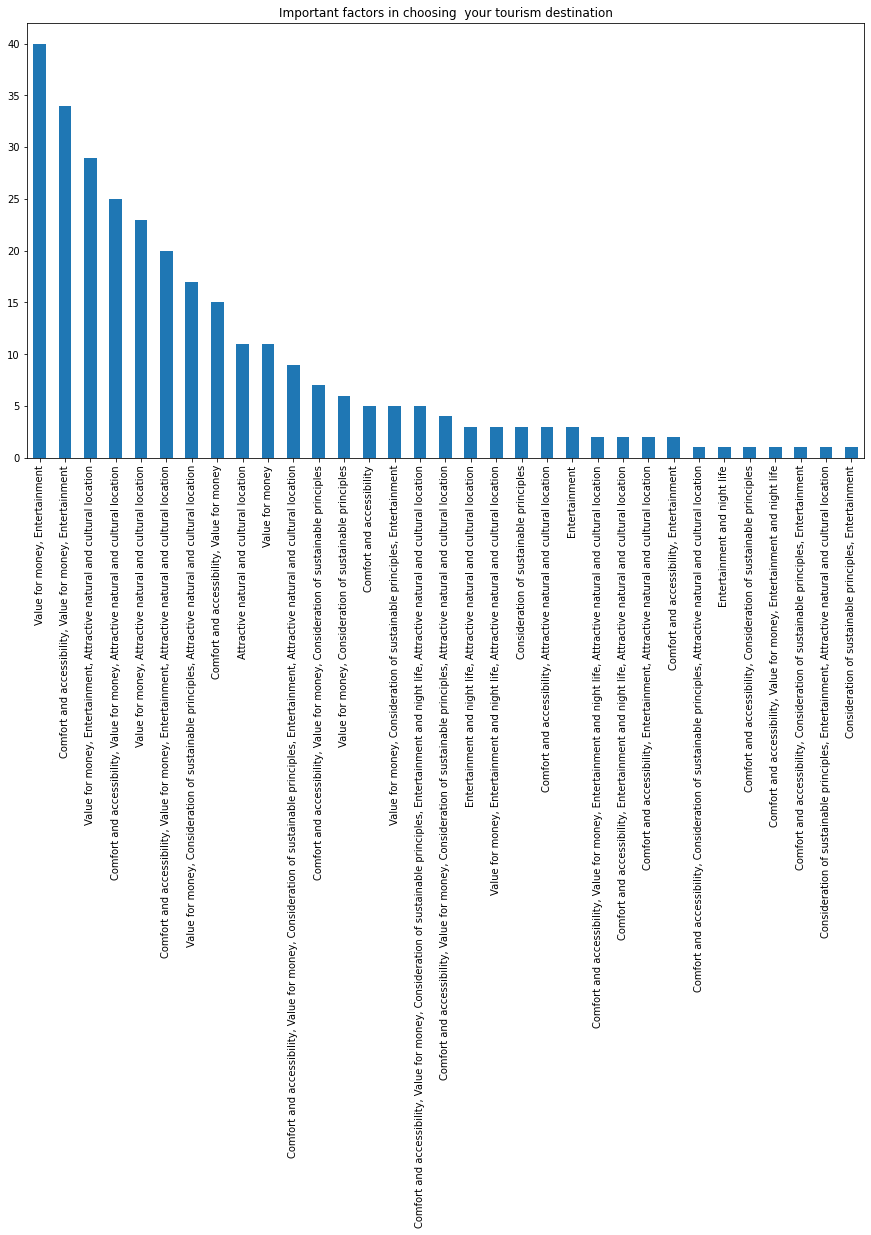

In [ ]:
df2['Important factors in choosing  your tourism destination'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("Important factors in choosing  your tourism destination")
plt.show()

# Visualization of attribute-priority if offered the following on tour

In [ ]:
df2['priority if offered the following on tour'].describe()

count                                                   296
unique                                                   15
top       Attend festivals and events, Shopping and markets
freq                                                     48
Name: priority if offered the following on tour, dtype: object

In [ ]:
df2['priority if offered the following on tour'].value_counts(ascending=True)

Visiting local heritage site, Joining local activities(example Crafts, traditions, local food production), Shopping and markets                                  7
Visiting local heritage site                                                                                                                                     7
Joining local activities(example Crafts, traditions, local food production), Shopping and markets                                                                7
Visiting local heritage site, Shopping and markets                                                                                                               8
Shopping and markets                                                                                                                                            10
Joining local activities(example Crafts, traditions, local food production)                                                                                     12
Attend festivals and e

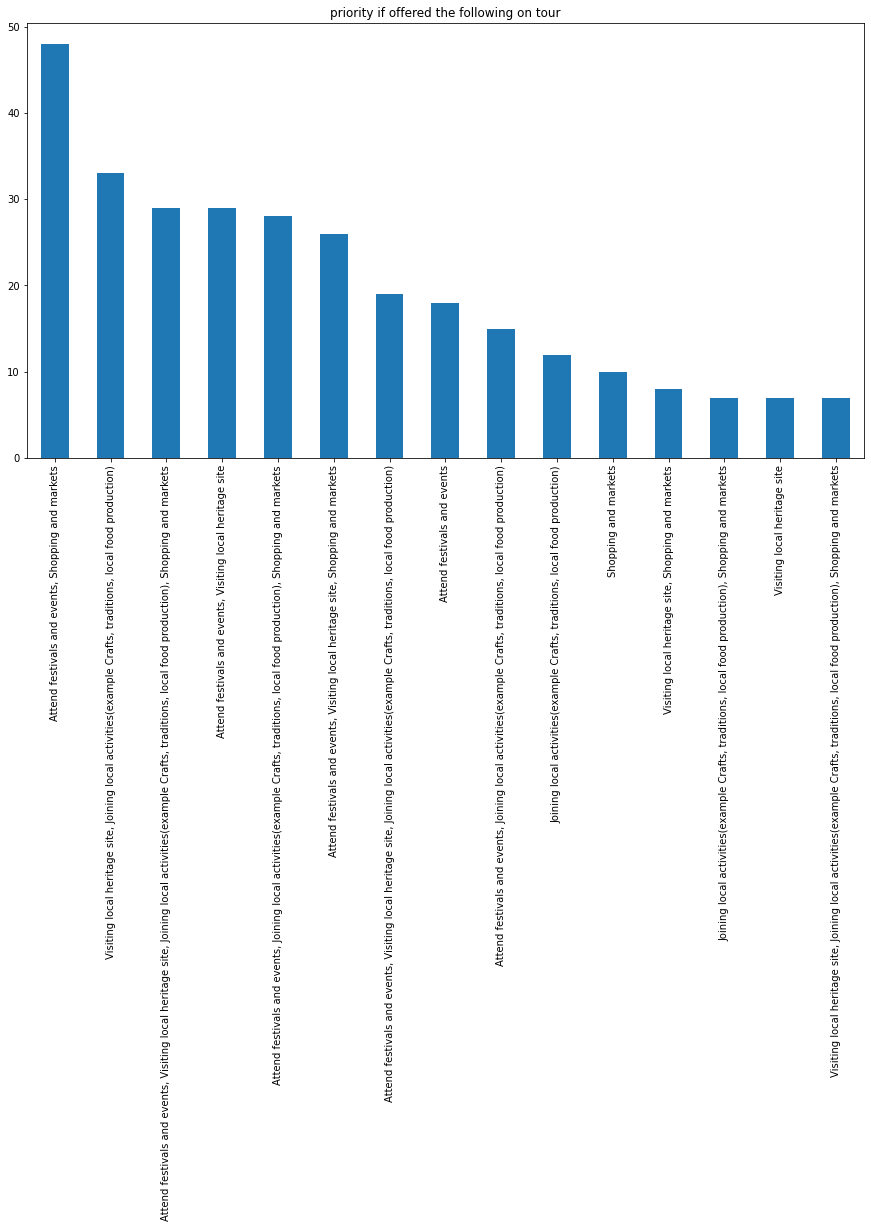

In [ ]:
df2['priority if offered the following on tour'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("priority if offered the following on tour")
plt.show()

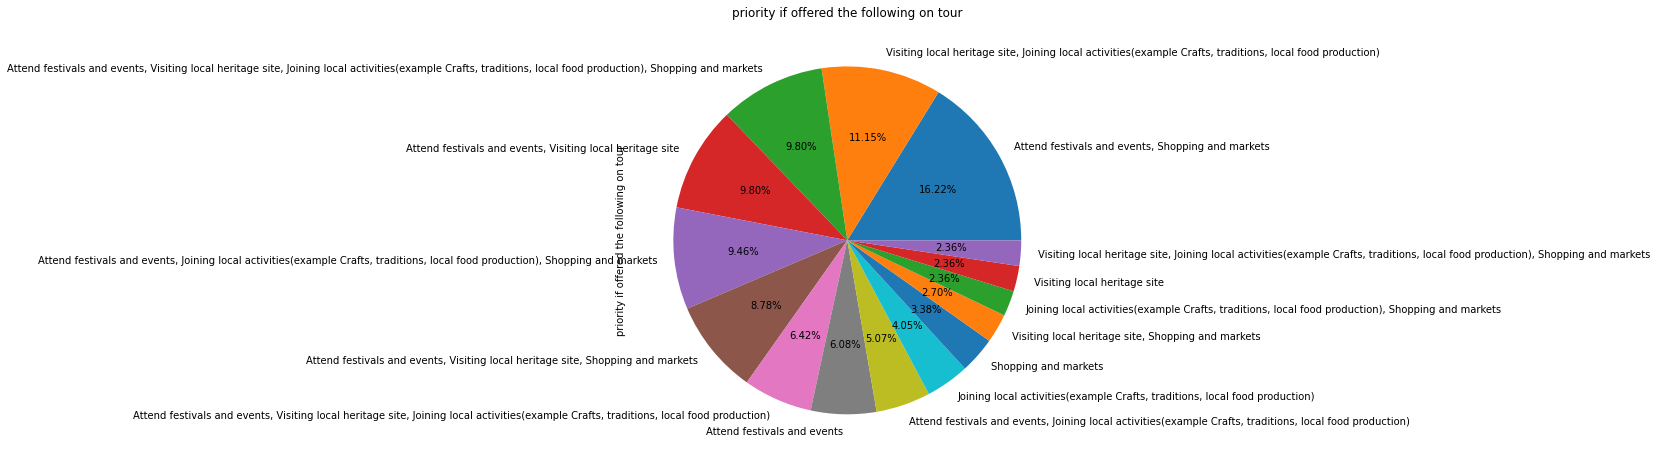

In [ ]:
df2['priority if offered the following on tour'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("priority if offered the following on tour")
plt.show()

#Visualization of attribute-Main reasons for visit

In [ ]:
df2['Main reasons for visit'].describe()

count                                                   296
unique                                                   27
top       Rest and relaxation, Visiting relatives and fr...
freq                                                     86
Name: Main reasons for visit, dtype: object

In [ ]:
df2['Main reasons for visit'].value_counts(ascending=True)

Attending conference seminar and other form of education, Health                                                                                    1
Business reasons, Attending conference seminar and other form of education                                                                          1
Business reasons, Sports                                                                                                                            1
Health                                                                                                                                              1
Visiting relatives and friends, Business reasons, Health, Sports                                                                                    1
Visiting relatives and friends, Health, Sports                                                                                                      1
Rest and relaxation, Attending conference seminar and other form of education, Health               

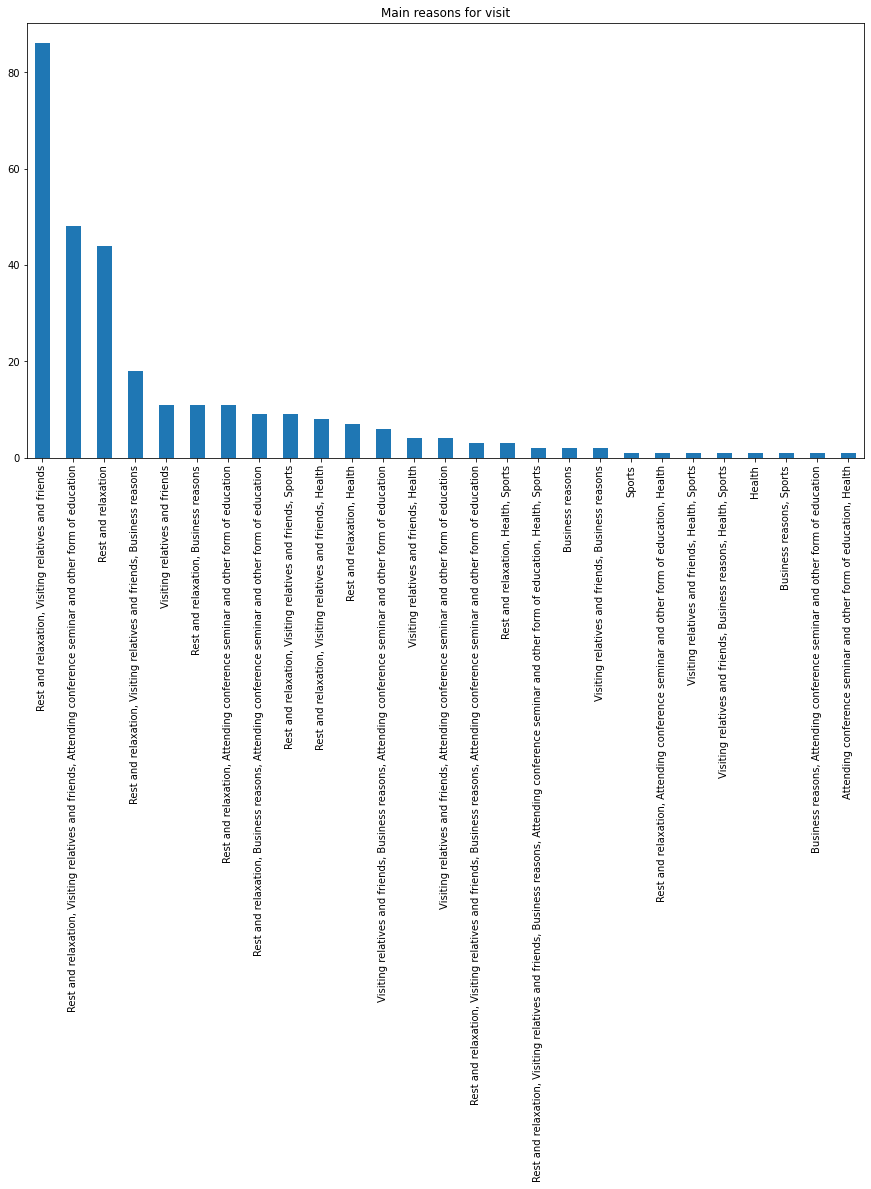

In [ ]:
df2['Main reasons for visit'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("Main reasons for visit")
plt.show()

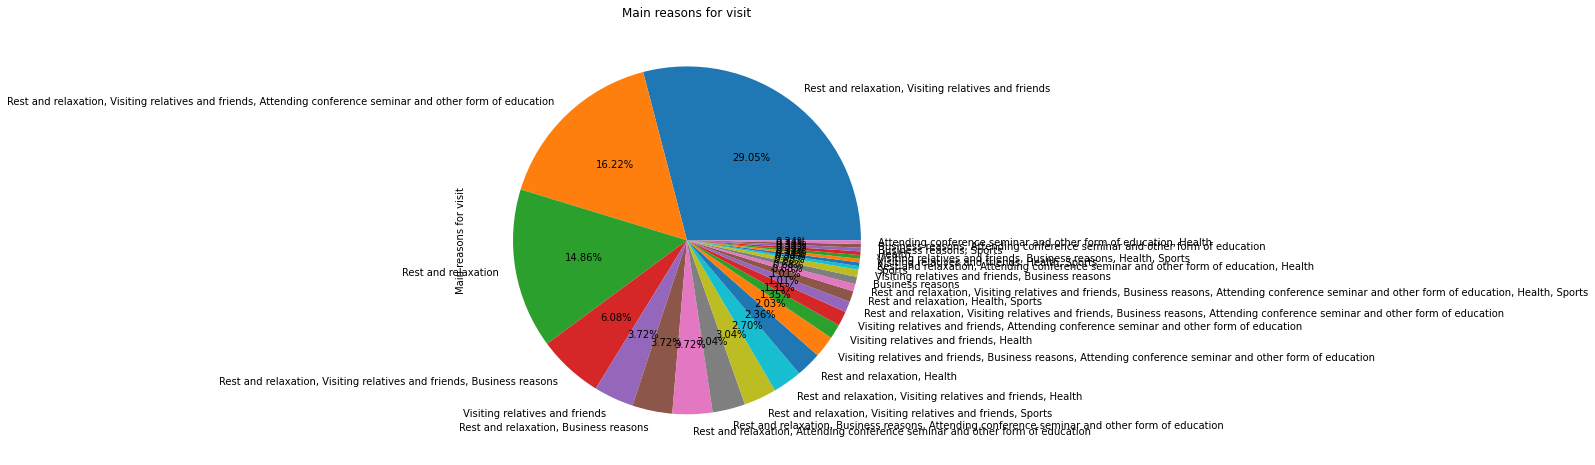

In [ ]:
df2['Main reasons for visit'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Main reasons for visit")
plt.show()

# Visualization of attribute-Frequency to visit tourist places in a year

In [ ]:
df2['Frequency to visit tourist places in a year'].describe()

count                  296
unique                   3
top       Once in 6 Months
freq                   189
Name: Frequency to visit tourist places in a year, dtype: object

In [ ]:
df2['Frequency to visit tourist places in a year'].value_counts(ascending=True)

Every Month          15
Once in a Year       92
Once in 6 Months    189
Name: Frequency to visit tourist places in a year, dtype: int64

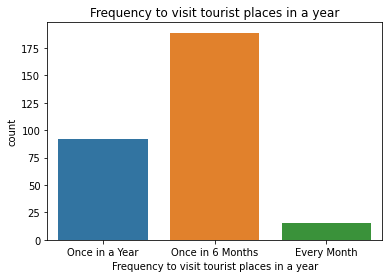

In [ ]:
sns.countplot(x='Frequency to visit tourist places in a year',data=df2)
plt.title("Frequency to visit tourist places in a year")
plt.show()

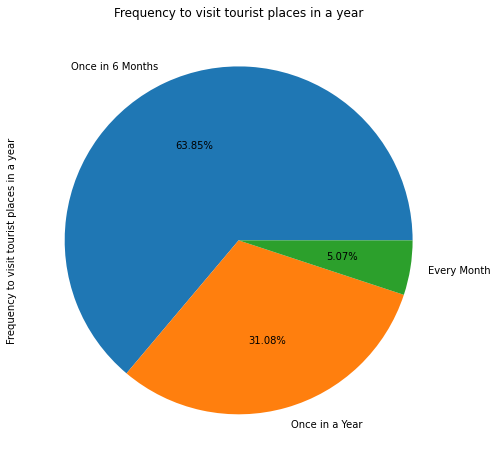

In [ ]:
df2['Frequency to visit tourist places in a year'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Frequency to visit tourist places in a year")
plt.show()

# Visualization of attribute-General length of trip

In [ ]:
df2['General length of trip'].describe()

count        296
unique         5
top       A week
freq         146
Name: General length of trip, dtype: object

In [ ]:
df2['General length of trip'].value_counts(ascending=True)

Depend on trip      1
A month            11
1-2 days           36
3-5 days          102
A week            146
Name: General length of trip, dtype: int64

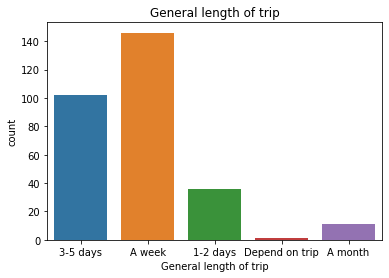

In [ ]:
sns.countplot(x='General length of trip',data=df2)
plt.title("General length of trip")
plt.show()

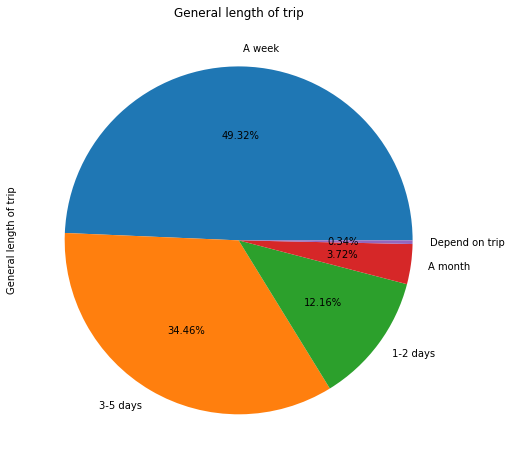

In [ ]:
df2['General length of trip'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("General length of trip")
plt.show()

#Visualization of attribute- Family Income Level (per annum)

In [ ]:
df2['Family Income Level (per annum):'].describe()

count               296
unique                4
top       5 lac- 15 lac
freq                138
Name: Family Income Level (per annum):, dtype: object

In [ ]:
df2['Family Income Level (per annum):'].value_counts(ascending=True)

25 lac and above     10
15 lac - 25 lac      52
Up to 5 lac          96
5 lac- 15 lac       138
Name: Family Income Level (per annum):, dtype: int64

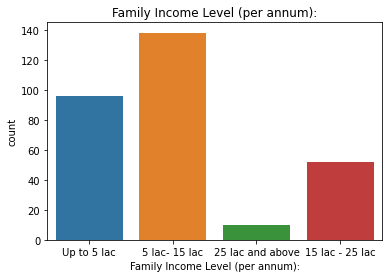

In [ ]:
sns.countplot(x='Family Income Level (per annum):',data=df2)
plt.title("Family Income Level (per annum):")
plt.show()

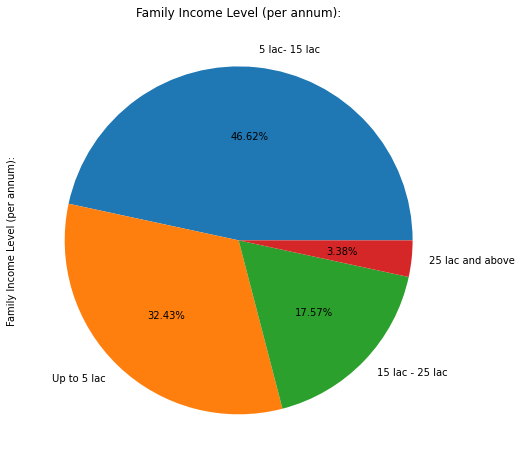

In [ ]:
df2['Family Income Level (per annum):'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Family Income Level (per annum):")
plt.show()

# Visualization of attribute-Amount spent on a trip on an average in a year

In [ ]:
df2['Amount spent on a trip on an average in a year'].describe()

count                   295
unique                    4
top       10,000  -  50,000
freq                    139
Name: Amount spent on a trip on an average in a year, dtype: object

In [ ]:
df2['Amount spent on a trip on an average in a year'].value_counts(ascending=True)

Above 1 lac            5
50,000 - 1 lac        26
Up to 10,000         125
10,000  -  50,000    139
Name: Amount spent on a trip on an average in a year, dtype: int64

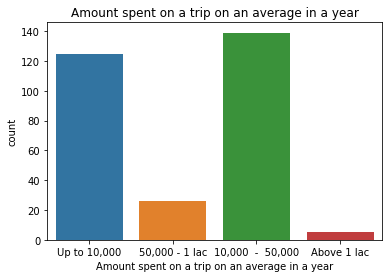

In [ ]:
sns.countplot(x='Amount spent on a trip on an average in a year',data=df2)
plt.title("Amount spent on a trip on an average in a year")
plt.show()

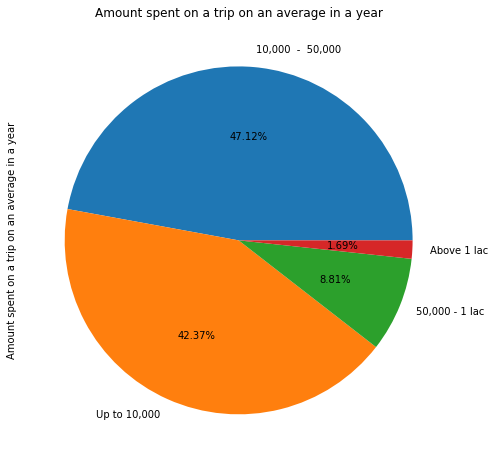

In [ ]:
df2['Amount spent on a trip on an average in a year'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Amount spent on a trip on an average in a year")
plt.show()

#Visualization of attribute-Preferred medium to book a tour


In [ ]:
df2['Preferred medium to book a tour'].describe()

count                                                   296
unique                                                   29
top       Website of travel agents or tour operators, On...
freq                                                     47
Name: Preferred medium to book a tour, dtype: object

In [ ]:
df2['Preferred medium to book a tour'].value_counts(ascending=True)

High Street travel agents, Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation     1
High Street travel agents, Email or phone to individual accommodation                                                                                         1
By self                                                                                                                                                       1
High Street travel agents, Website of travel agents or tour operators, Online booking agency                                                                  1
High Street travel agents, Online booking agency, Email or phone to individual accommodation                                                                  1
High Street travel agents, Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation                      2
High Street travel agents, Online bookin

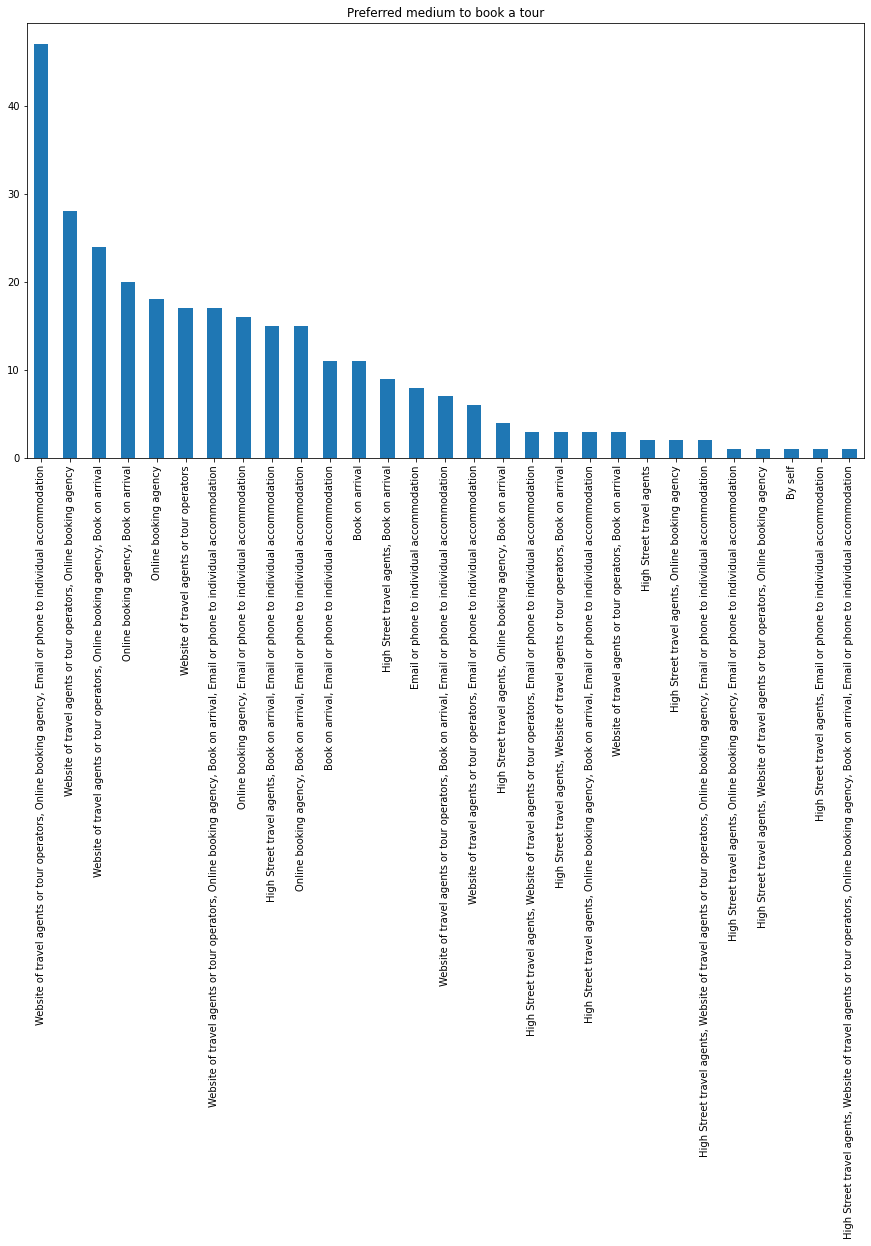

In [ ]:
df2['Preferred medium to book a tour'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("Preferred medium to book a tour")
plt.show()

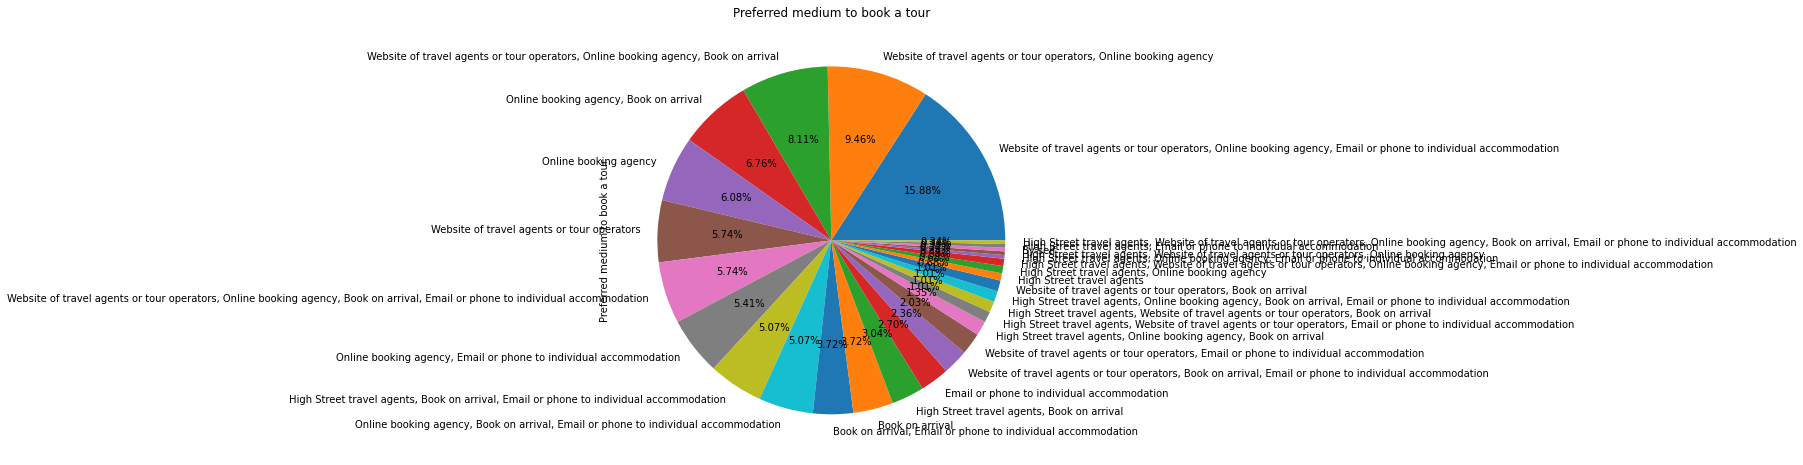

In [ ]:
df2['Preferred medium to book a tour'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Preferred medium to book a tour")
plt.show()

# Destination Name

In [ ]:
df2['Destination Name'].describe()

count          130
unique          88
top       Maldives
freq            13
Name: Destination Name, dtype: object

In [ ]:
df2['Destination Name'].value_counts(ascending=True)

Kerala, Gujarat, Ladakh     1
Wonder park                 1
Sri lanka                   1
UsA                         1
Manali, Ladak               1
                           ..
London                      4
Paris                       5
Manali                      5
Goa                         6
Maldives                   13
Name: Destination Name, Length: 88, dtype: int64

# Comparison of attributes

---






Age wise visualization of people like to travel or not





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function seaborn.utils.despine>

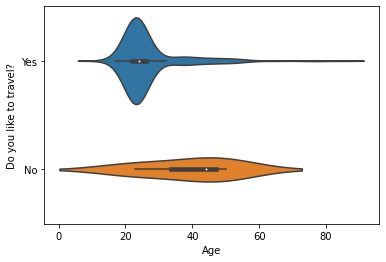

In [ ]:
sns.violinplot(df2['Age'],df2['Do you like to travel?'])
sns.despine

Age wise most preferred type of destination

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function seaborn.utils.despine>

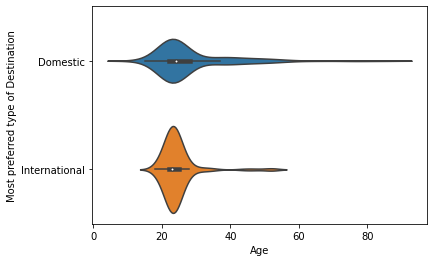

In [ ]:
sns.violinplot(df2['Age'],df2['Most preferred type of Destination'])
sns.despine

Gender wise visualization of Challenging problems faced when choosing a destination

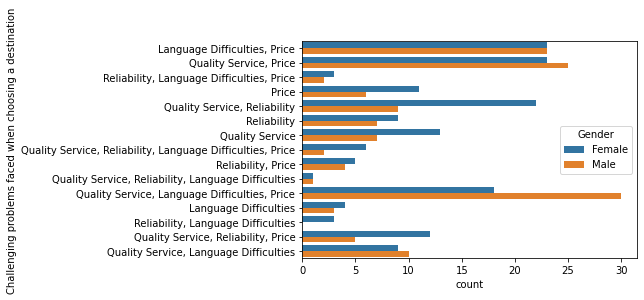

In [ ]:
sns.countplot(data=df2, y='Challenging problems faced when choosing a destination',hue='Gender')

Age wise visualization of Challenging problems faced when choosing a destination

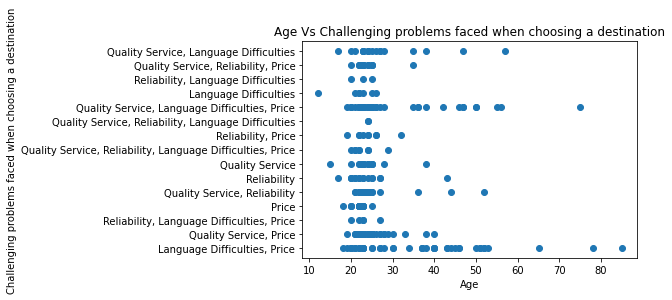

In [ ]:
x=df2['Age']
y=df2['Challenging problems faced when choosing a destination']
plt.xlabel('Age')
plt.ylabel('Challenging problems faced when choosing a destination')
plt.title("Age Vs Challenging problems faced when choosing a destination")
plt.scatter(x,y)
plt.show()


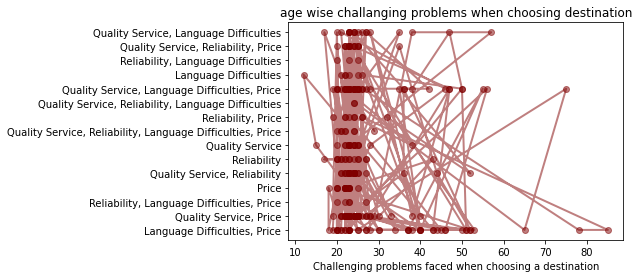

In [ ]:
x=df2['Age']
y=df2['Challenging problems faced when choosing a destination']
plt.xlabel("Age")
plt.xlabel("Challenging problems faced when choosing a destination")
plt.plot(x,y,linewidth=2.0,color='maroon',alpha=0.5,marker='o')
plt.title("age wise challanging problems when choosing destination")
plt.show()

Gender wise visualization of priorities of facilities offered on tour

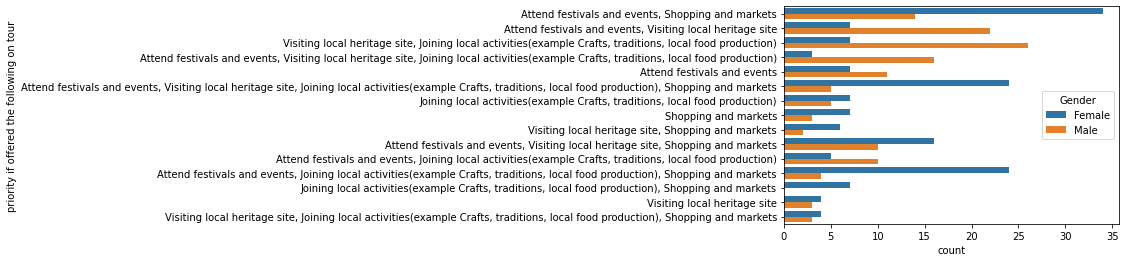

In [ ]:
sns.countplot(data=df2, y='priority if offered the following on tour',hue='Gender')

Age wise visualization of Preferred type of way to search destination to visit

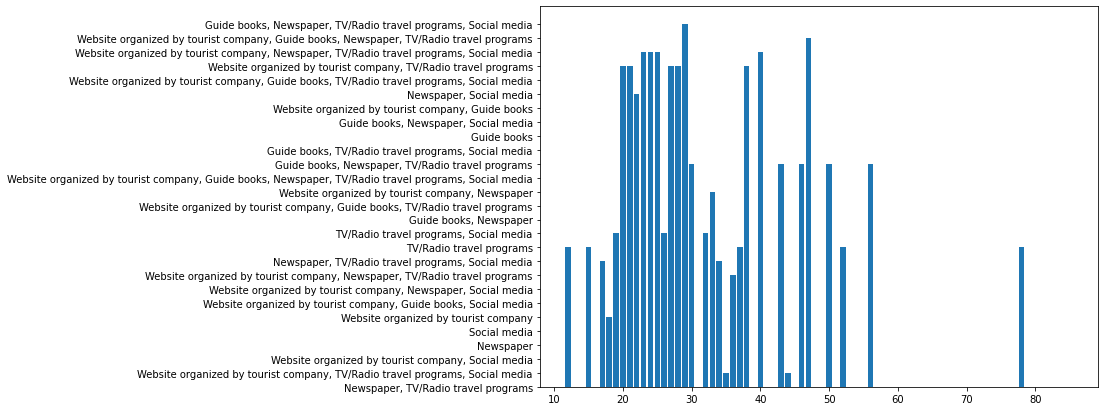

In [ ]:
Age= df2['Age']
medium = df2['Preferred type of way to search destination to visit']
fig = plt.figure(figsize =(10, 7))
plt.bar(Age, medium)
plt.show()


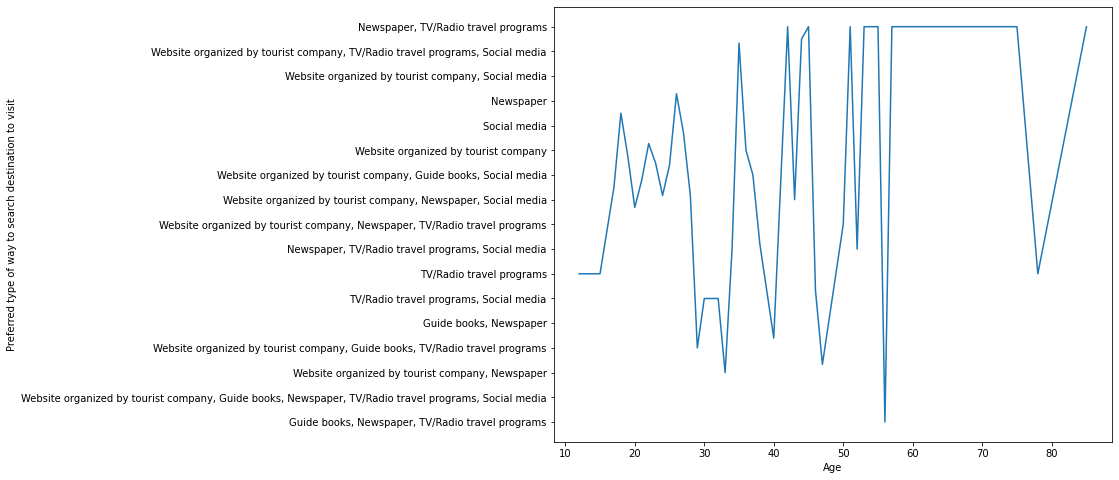

In [ ]:
plt.subplots(figsize=(10,8))
sns.lineplot(data=df2, x='Age', y='Preferred type of way to search destination to visit', ci=None)
plt.show()

  Comparison of Amount spent on a trip on an average in a year and Family Income Level (per annum)



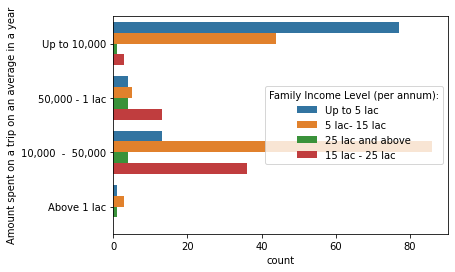

In [ ]:
sns.countplot(data=df2, y='Amount spent on a trip on an average in a year',hue='Family Income Level (per annum):')


Age wise preferred medium to book a tour

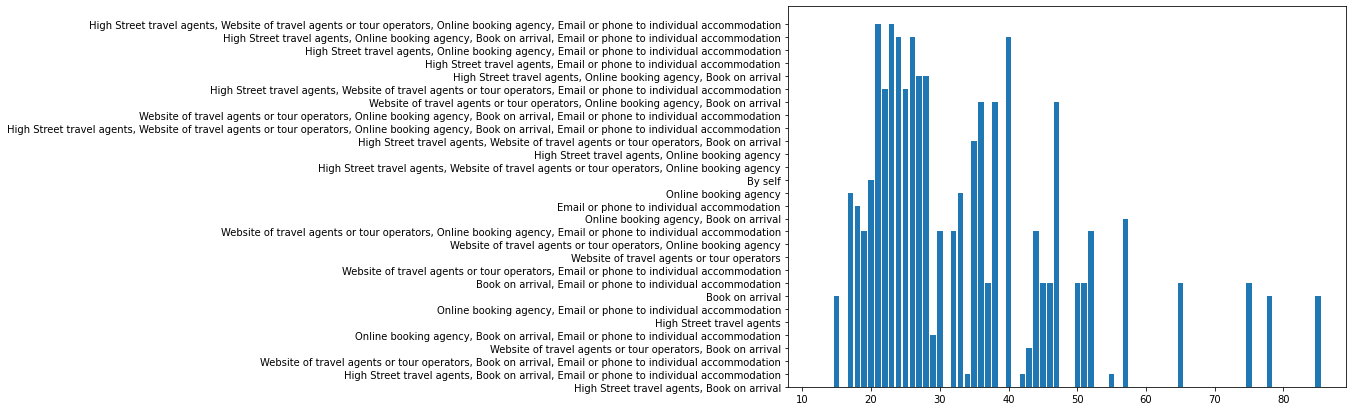

In [ ]:
Age= df2['Age']
medium = df2['Preferred medium to book a tour']
fig = plt.figure(figsize =(10, 7))
plt.bar(Age, medium)
plt.show()


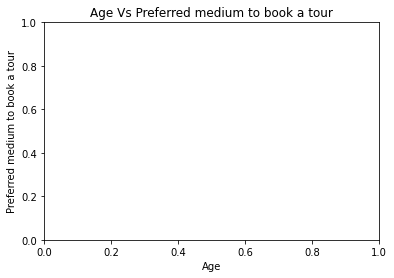

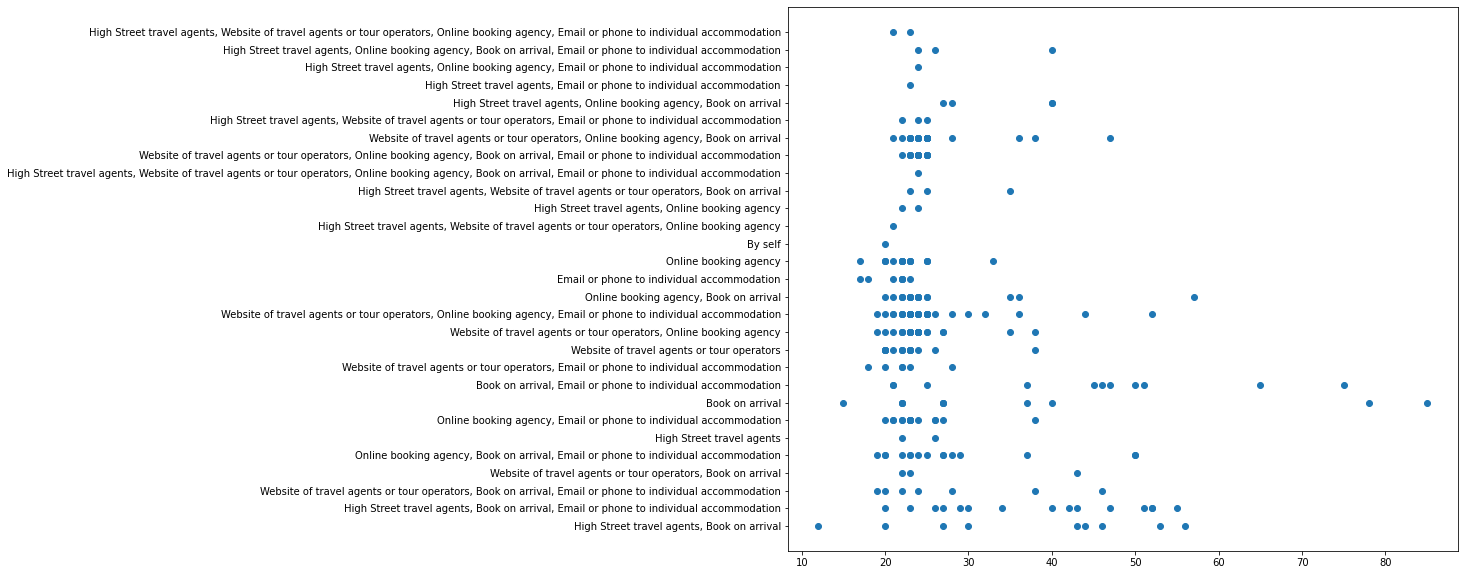

In [ ]:
x=df2['Age']
y=df2['Preferred medium to book a tour']
plt.xlabel('Age')
plt.ylabel('Preferred medium to book a tour')
plt.title("Age Vs Preferred medium to book a tour")
plt.subplots(figsize=(12,10))
plt.scatter(x,y)
plt.show()

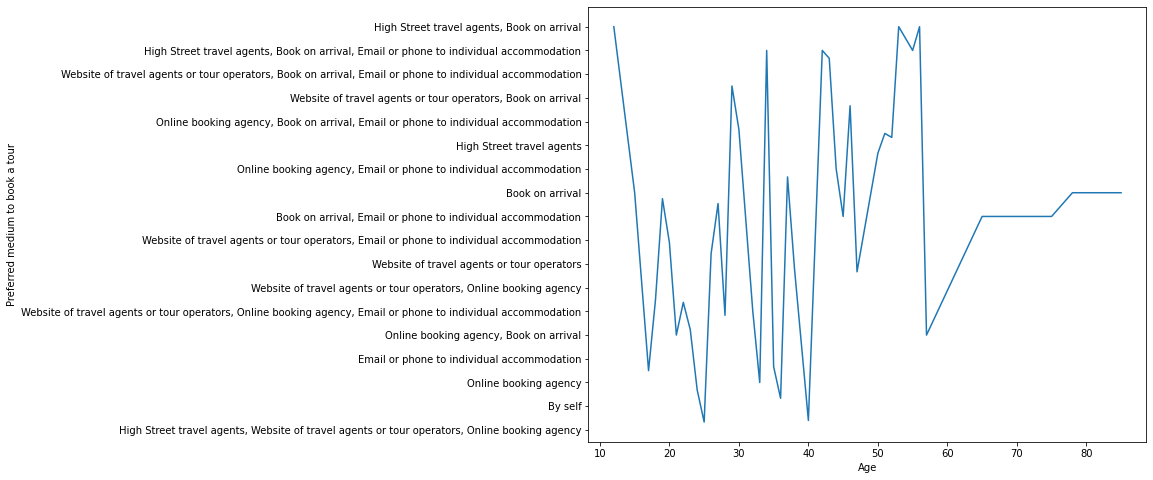

In [ ]:
plt.subplots(figsize=(10,8))
sns.lineplot(data=df2, x='Age', y='Preferred medium to book a tour', ci=None)
plt.show()